In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='white', context='notebook', palette='Set2')

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
games = pd.read_csv("../dataset/online-data/games.csv")
units = pd.read_csv("../dataset/online-data/units.csv")
orders = pd.read_csv("../dataset/online-data/orders.csv")
turns = pd.read_csv("../dataset/online-data/turns.csv")
players = pd.read_csv("../dataset/online-data/players.csv")

## データセットの確認
https://data.world/maxstrange/diplomacyboardgame

In [3]:
games.head()

,id,num_turns,num_players
0,37317,166,7
1,37604,51,7
2,39337,101,7
3,40541,46,7
4,44755,96,7


In [4]:
players.head()

,game_id,country,won,num_supply_centers,eliminated,start_turn,end_turn
0,114417,E,0,0,0,1,7
1,114417,F,0,9,0,1,21
2,114417,I,0,0,0,1,7
3,114417,G,0,4,0,1,17
4,114417,A,1,11,0,1,21


In [5]:
units.head()

,game_id,country,type,start_turn,end_turn,unit_id
0,114417,E,F,0,7,0
1,114417,E,A,0,10,1
2,114417,E,F,0,13,2
3,114417,F,A,0,21,3
4,114417,F,A,0,21,4


In [6]:
turns.head()

,game_id,turn_num,phase,year,season,scs_england,scs_france,scs_italy,scs_russia,scs_turkey,scs_germany,scs_austria
0,114417,0,Winter,1900,Winter,3,3,3,4,3,3,3
1,114417,1,Orders,1901,Spring,3,3,3,4,3,3,3
2,114417,2,Orders,1901,Fall,3,3,3,4,3,3,3
3,114417,3,Build,1901,Fall,4,6,4,6,4,4,5
4,114417,4,Orders,1902,Spring,4,6,4,6,4,4,5


In [4]:
orders

,game_id,unit_id,unit_order,location,target,target_dest,success,reason,turn_num
0,114417,0,MOVE,Edinburgh,Norwegian Sea,NaN,1,NaN,1
1,114417,1,MOVE,Liverpool,Yorkshire,NaN,1,NaN,1
2,114417,2,MOVE,London,North Sea,NaN,1,NaN,1
3,114417,3,MOVE,Marseilles,Spain,NaN,1,NaN,1
4,114417,4,MOVE,Paris,Picardy,NaN,1,NaN,1
5,114417,5,MOVE,Brest,Mid-Atlantic Ocean,NaN,1,NaN,1
6,114417,6,HOLD,Venice,NaN,NaN,1,NaN,1
7,114417,7,HOLD,Rome,NaN,NaN,1,NaN,1
8,114417,8,MOVE,Naples,Tyrrhenian Sea,NaN,1,NaN,1
9,114417,9,MOVE,Munich,Silesia,NaN,1,NaN,1


In [5]:
import seaborn as sns

## データ分析
### ゲームの概観を知る

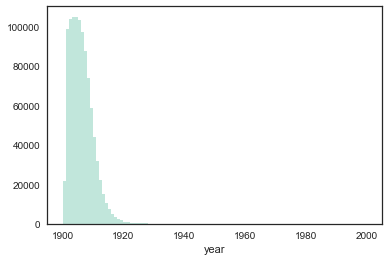

In [12]:
# 1ゲームあたりのターン数
x = turns['year']
sns.distplot(x, kde=False, rug=False, bins=100)

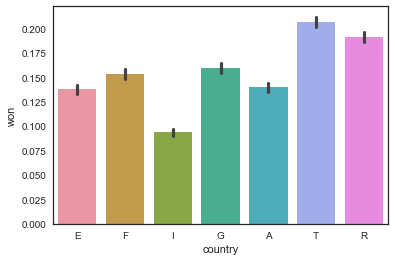

In [13]:
# 国ごとの勝率比較
sns.barplot(x="country", y="won", data = players)

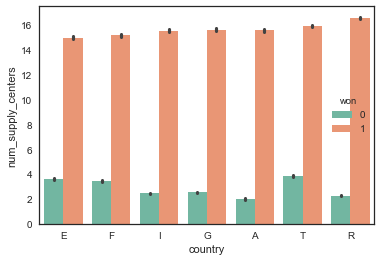

In [14]:
# 国ごとの補給地の数（平均, 勝ち負け別）
sns.barplot(x="country", y="num_supply_centers", hue="won", data = players)

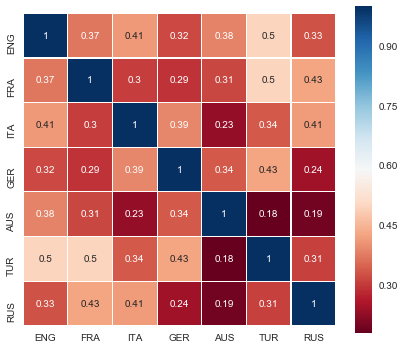

In [18]:
# 国と終了ターンの相関を調べる
correlation_matrix = np.corrcoef([players[(players["country"] == "E")]["end_turn"],
           players[(players["country"] == "F")]["end_turn"],
           players[(players["country"] == "I")]["end_turn"],
           players[(players["country"] == "G")]["end_turn"],
           players[(players["country"] == "A")]["end_turn"],
           players[(players["country"] == "T")]["end_turn"],
           players[(players["country"] == "R")]["end_turn"]])
correlation_matrix = pd.DataFrame(correlation_matrix)
correlation_matrix = correlation_matrix.rename(columns={0:"ENG", 1:"FRA", 2:"ITA", 3:"GER", 4:"AUS", 5:"TUR", 6:"RUS"},
                                              index={0:"ENG", 1:"FRA", 2:"ITA", 3:"GER", 4:"AUS", 5:"TUR", 6:"RUS"})

plt.figure(figsize=(7,6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.1, square=True, cmap="RdBu")

### [wip] unitの動きについて分析
<img src="../img/maxresdefault.jpg" width="300">

In [7]:
# merge dataset
dataset = pd.merge(orders, units, on=['game_id', 'unit_id'])
dataset = pd.merge(dataset, players, on=['game_id', 'country'])
dataset = pd.merge(dataset, turns, on=['game_id', 'turn_num'])

#### MOVEについて解析

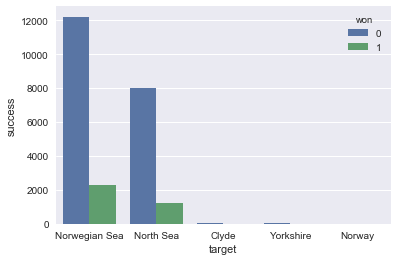

In [14]:
# Edinburghからの移動先
data = dataset[(dataset["year"]==1901)
               & (dataset["season"]=="Spring")
               & (dataset["success"]==1) 
               & (dataset["location"]=="Edinburgh") 
               & (dataset["unit_order"]=="MOVE")]
sns.barplot(x="target", y="success", data = data, hue="won", estimator=sum)

#### SUPPORTに関して解析

In [8]:
dataset.size

447818280

## [wip] エージェントを作る
目的：評価関数を作りたい，年においてどの土地が重要であるか

- 案1：1905年，春の評価値を作りたい，場合，1905年に行った動作が重要とすれば良い
- 案2：場所と補給地の数からの情報で評価関数を作る

### 案1

In [9]:
tyear = dataset["year"].unique()
tseason = dataset["season"].unique()
tcountry = dataset["country"].unique()
tlocation = dataset["location"].unique()
tunit_order = ["MOVE", "HOLD", "SUPPORT"] #dataset["unit_order"].unique()

In [12]:
tlocation

array(['Edinburgh', 'Liverpool', 'London', 'Marseilles', 'Paris', 'Brest',
       'Venice', 'Rome', 'Naples', 'Munich', 'Berlin', 'Kiel', 'Vienna',
       'Trieste', 'Budapest', 'Constantinople', 'Ankara', 'Smyrna',
       'Moscow', 'St. Petersburg (South Coast)', 'Warsaw', 'Sevastopol',
       'Norwegian Sea', 'Yorkshire', 'North Sea', 'Spain', 'Picardy',
       'Mid-Atlantic Ocean', 'Tyrrhenian Sea', 'Silesia', 'Holland',
       'Albania', 'Serbia', 'Bulgaria', 'St. Petersburg',
       'Gulf of Bothnia', 'Ukraine', 'Norway', 'Belgium', 'Portugal',
       'Piedmont', 'Tunis', 'Galicia', 'Greece', 'Black Sea', 'Finland',
       'Sweden', 'Rumania', 'Helgoland Bight', 'Burgundy',
       'English Channel', 'Tyrolia', 'Ionian Sea', 'Denmark', 'Wales',
       'Irish Sea', 'Armenia', 'St. Petersburg (North Coast)',
       'North Atlantic Ocean', 'Ruhr', 'Aegean Sea', 'Apulia',
       'Skagerrack', nan, 'Gascony', 'Prussia', 'Barents Sea', 'Bohemia',
       'Adriatic Sea', 'Western Mediterra

In [17]:
df_new = pd.DataFrame(columns=["in","out1","out2"])

In [24]:
# 特定の条件におけるデータ抽出
for xyear in tyear:
    for xseason in tseason:
        for xcountry in tcountry:
#             for xlocation in tlocation:
#                 for xunit_order in tunit_order:
                    data = dataset[(dataset["year"]==xyear)
                       & (dataset["season"]==xseason)
                       & (dataset["success"]==1)
                       & (dataset["country"]==xcountry)]
#                        & (dataset["location"]==xlocation) 
#                        & (dataset["unit_order"]==xunit_order)]
#                & (0 <= dataset["scs_england"]) & (dataset["scs_england"] <= 3)
#                & (0 <= dataset["scs_france"]) & (dataset["scs_france"] <= 3)
#                & (0 <= dataset["scs_italy"]) & (dataset["scs_italy"] <= 3)
#                & (0 <= dataset["scs_russia"]) & (dataset["scs_russia"] <= 4)
#                & (0 <= dataset["scs_turkey"]) & (dataset["scs_turkey"] <= 3)
#                & (0 <= dataset["scs_germany"]) & (dataset["scs_germany"] <= 3)
#                & (0 <= dataset["scs_austria"]) & (dataset["scs_austria"] <= 3)]
                    # データ抽出の際の条件
                    inputs = str(xyear) + str(xseason) + str(xcountry)# + str(xlocation) + str(xunit_order)
                    print(inputs)
                    # 行動と勝率を求める
                    out_1 = data[(data["won"]==1)]["target"].value_counts()
                    out_2 = data["target"].value_counts()
                    df2 = pd.DataFrame({'in': [inputs], 'out1': [out_1], 'out2':[out_2]})
                    df_new = df_new.append(df2)
    if xyear > 1901:
        break

1901SpringE
1901SpringF
1901SpringI
1901SpringG
1901SpringA
1901SpringT
1901SpringR
1901FallE
1901FallF
1901FallI
1901FallG
1901FallA
1901FallT
1901FallR
1902SpringE
1902SpringF
1902SpringI
1902SpringG
1902SpringA
1902SpringT
1902SpringR
1902FallE
1902FallF
1902FallI
1902FallG
1902FallA
1902FallT
1902FallR


In [28]:
df_new = df_new.append(df2)

In [29]:
df_new

,in,out1,out2
0,1902FallR,Rumania 2703 arm...,Rumania 8081 arm...


In [74]:
df_new.to_csv("dataset.csv")

### 案2